# [Problem 1] Understanding the content of the competition

**1. What kind of company is Home Credit?** <br> Home Credit is an international non-bank financial institution that focuses on installment lending services<br> to people with little or no credit history.<br><br>
**2. What is expected in this competition?**<br> participants are expected to create a machine learning model that will predict thee ability of a client to repay his/her loan.<br><br> 
**3. What are the benefits companies can gain by predicting this?**<br>- The predication will ensure that clients capable of repayment are not rejected<br>- The company will make more profit since more loans will be given with a principal, maturity, and repayment calendar that will empower their clients to be successful.  


# [Problem 2] Understanding the overview of data

In [2]:
# IMPORTING  ALL NEEDED MODULES AND DISOLAYING THE FIRST FIVE ROWS OF THE DATASET
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
application_train = pd.read_csv("application_train.csv")
application_train.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan.<br> Such case is marked as 1 while other all other cases as 0.

In [3]:
print("application_train -  rows:",application_train.shape[0]," columns:", application_train.shape[1])
# DISPLAY THE NUMBER OF ROWS AND COLUMN IN THE DATASET

application_train -  rows: 307511  columns: 122


There are total 307,511 rows which contains the information of loans and there are 122 variables.

In [4]:
application_train.columns.values
# LIST ALL THE COLUMN VALUES

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [5]:
application_train.info()
# GIVE THE BASIC STRUCTURE OF THE DATASET LIKE THE NUMBER OF COLUMN ENTRIES, NUMBER OF FLOAT,INTEGER AND STRING DATA TYPES ETC

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
application_train.describe()
# GIVE THE MEAN, STANDARD DEVIATION, INTERQUATILE RANGE FOR EACH COLUMN

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


**Check missing values**

In [7]:
application_train.isnull().any()
# DISPLAY MISSING VALUES IN THE FORM OF BOOLEAN

SK_ID_CURR                    False
TARGET                        False
NAME_CONTRACT_TYPE            False
CODE_GENDER                   False
FLAG_OWN_CAR                  False
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY      True
AMT_REQ_CREDIT_BUREAU_WEEK     True
AMT_REQ_CREDIT_BUREAU_MON      True
AMT_REQ_CREDIT_BUREAU_QRT      True
AMT_REQ_CREDIT_BUREAU_YEAR     True
Length: 122, dtype: bool

In [8]:
application_train.isnull().sum()
# THE SUM OF MISSING VALUES FOR EACH COLUMN

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [9]:
application_train.isnull().any().value_counts()

True     67
False    55
dtype: int64

In [10]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(application_train)#.head(10)

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
...,...,...
REG_CITY_NOT_LIVE_CITY,0,0.000000
LIVE_REGION_NOT_WORK_REGION,0,0.000000
REG_REGION_NOT_WORK_REGION,0,0.000000
HOUR_APPR_PROCESS_START,0,0.000000


Draw a graph showing the percentage of classes

In [11]:
from matplotlib import pyplot as plt

array([[<AxesSubplot:title={'center':'Total'}>,
        <AxesSubplot:title={'center':'Percent'}>]], dtype=object)

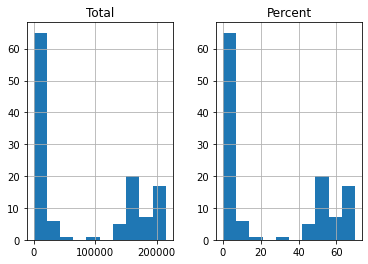

In [12]:
missing_data(application_train).hist()

# [Problem 3] Defining issues

1 number of childern<br>
2 customer that defulters base on family status<br>
3 The relationship between the features and the target<br>
4 What is the source of income for customers with paid loan<br>
5 The income state of customers with defulted loans<br>
6 customers by organisation with defaulted loans<br>
7 what is the family size of marriage customers<br>
8 family status of single customers<br>
9 what contact type can repay loan<br>
10 what gender have the highest rate of defaulters<br>
11 How distributed is the target in  the dataset<br>
12 how many customers own a car<br>
13 how many customers do not own a car<br>
14 How many car owners can pay their loans<br>
15 customer load status base on number of childern

# [Problem 4] Data exploration

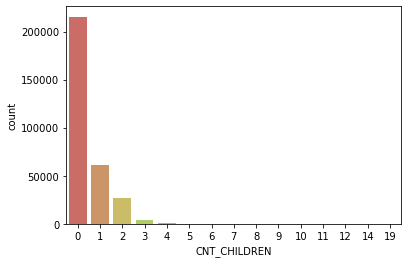

In [14]:
sns.countplot(x='CNT_CHILDREN', data=application_train, palette='hls')
plt.show()

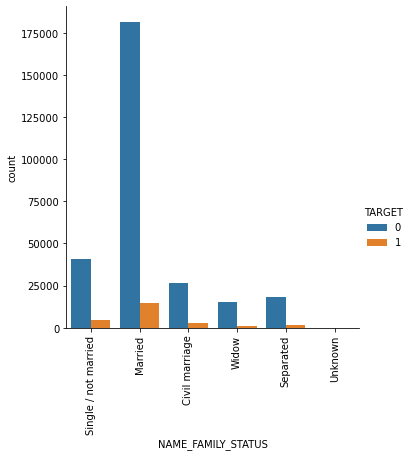

In [15]:
sns.catplot(data=application_train,x='NAME_FAMILY_STATUS',hue='TARGET',kind='count');
plt.xticks(rotation=90);

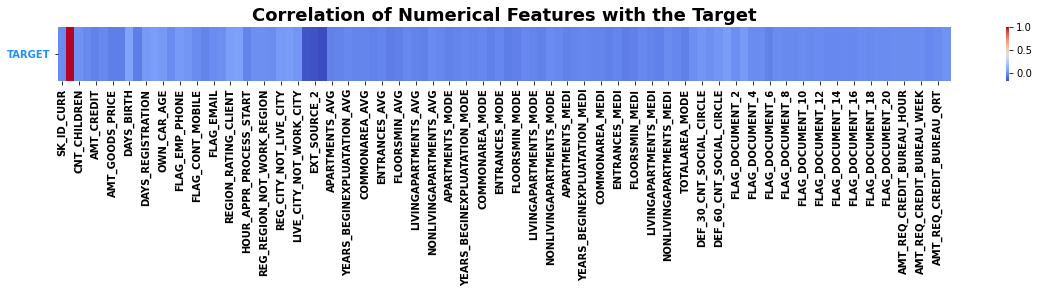

In [16]:
# what is the relationship between features and target?
plt.figure(figsize=(20,1))
sns.heatmap(application_train.corr().sort_values(by = ['TARGET'], ascending = False).head(1), cmap='coolwarm', annot=False, annot_kws={'size': 8}, fmt = '.2f')

plt.title('Correlation of Numerical Features with the Target', weight = 'bold', fontsize = 18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)

plt.show()

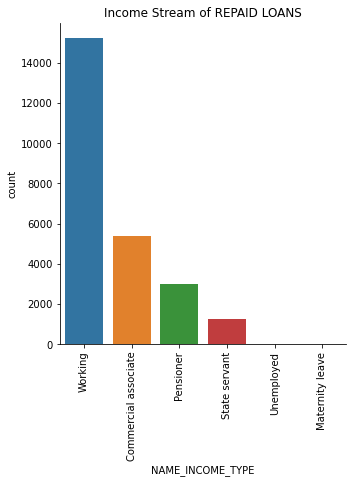

In [17]:
# what is the income stream of custimers with repaid loan?
paid = application_train[application_train.TARGET==1]
sns.catplot(data=unpaid,x='NAME_INCOME_TYPE',kind='count');
plt.xticks(rotation=90);
plt.title('Income Stream of PAID LOANS');

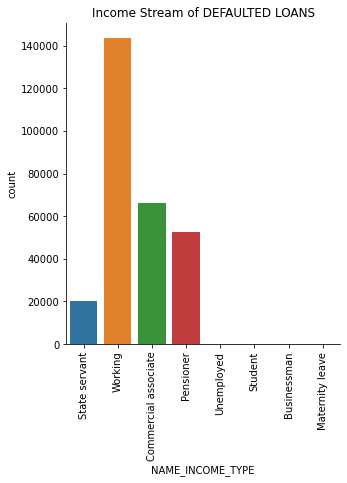

In [18]:
# what is the income stream of custimers with defulted loan?
unpaid = application_train[application_train.TARGET==0]
sns.catplot(data=unpaid,x='NAME_INCOME_TYPE',kind='count');
plt.xticks(rotation=90);
plt.title('Income Stream of DEFAULTED LOANS');

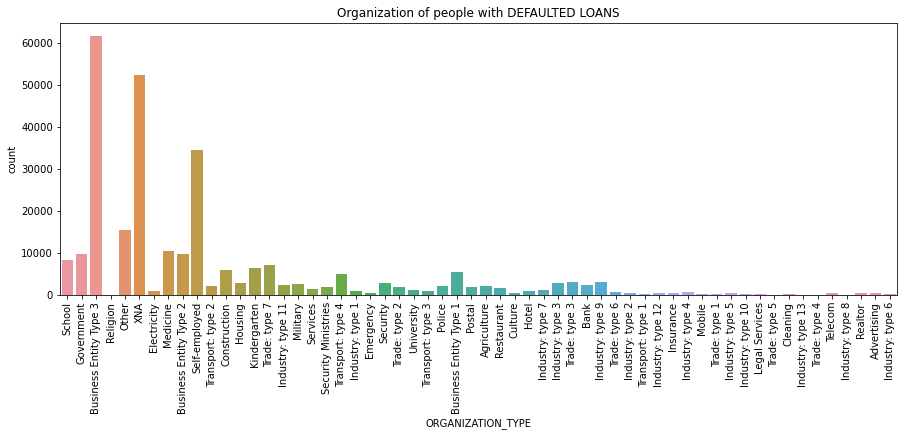

In [19]:
fig,ax = plt.subplots(figsize=(15,5))
sns.countplot(data=unpaid,x='ORGANIZATION_TYPE',ax=ax);
plt.xticks(rotation=90)
plt.title('Organization of people with DEFAULTED LOANS')
plt.show()

In [28]:
# family size of marriage customers
application_train[['CNT_CHILDREN','NAME_FAMILY_STATUS',
          'CNT_FAM_MEMBERS']][application_train.NAME_FAMILY_STATUS=='Married'].tail()

,CNT_CHILDREN,NAME_FAMILY_STATUS,CNT_FAM_MEMBERS
307500,0,Married,2.0
307501,3,Married,5.0
307502,1,Married,3.0
307509,0,Married,2.0
307510,0,Married,2.0


In [27]:
# family size of single customers
sing_cust = application_train[['CNT_CHILDREN','NAME_FAMILY_STATUS',
          'CNT_FAM_MEMBERS']][application_train.NAME_FAMILY_STATUS!='Married'].tail()

,CNT_CHILDREN,NAME_FAMILY_STATUS,CNT_FAM_MEMBERS
307504,0,Separated,1.0
307505,0,Single / not married,1.0
307506,0,Separated,1.0
307507,0,Widow,1.0
307508,0,Separated,1.0


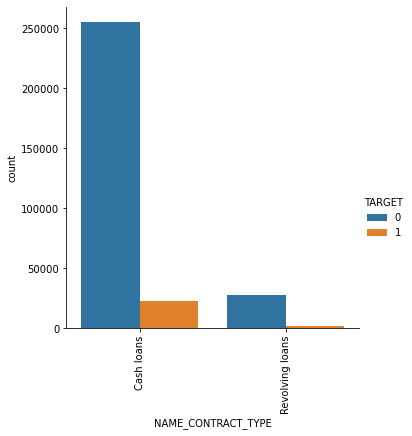

In [22]:
# what contact type that can pay loan
sns.catplot(data=application_train,x='NAME_CONTRACT_TYPE',hue='TARGET',kind='count');
plt.xticks(rotation=90);

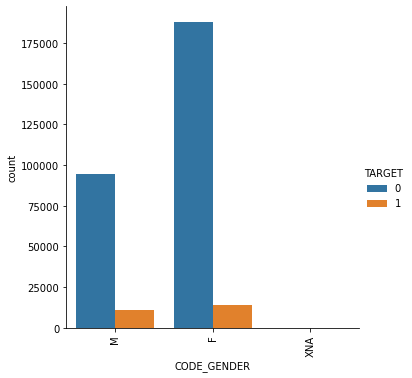

In [23]:
# what is the relationship between 
sns.catplot(data=application_train,x='CODE_GENDER',hue='TARGET',kind='count');
plt.xticks(rotation=90);

0    282686
1     24825
Name: TARGET, dtype: int64


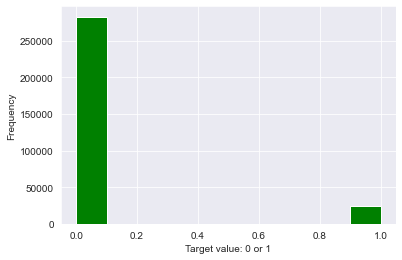

In [24]:
# Show target distribution
sns.set_style('darkgrid')
print(application_train.TARGET.value_counts())
application_train.TARGET.plot.hist(color='green').set_xlabel('Target value: 0 or 1');


In [25]:
# How many People owns a car
carY=application_train[application_train.FLAG_OWN_CAR=='Y'].value_counts().sum()
print('Number of people that owns a car:', carY)

Number of people that owns a car: 8602


How many People owns a car: 104587 ( 34.01 %)
People count who DOES NOT own a car: 202924 ( 65.99 %)
Percentage of people who defaulted (with cars): 7.24 %
Percentage of people who defaulted (no cars): 8.5 %

In [34]:
#People count who DOES NOT own a car: 
carN=application_train[application_train.FLAG_OWN_CAR=='N'].value_counts().sum()
print(carN)

0


In [33]:
print('How many missing values on OWN_CAR_AGE? :',application_train.OWN_CAR_AGE.isnull().sum())

How many missing values on OWN_CAR_AGE? : 202929


E:\Anaconda3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TARGET', ylabel='count'>

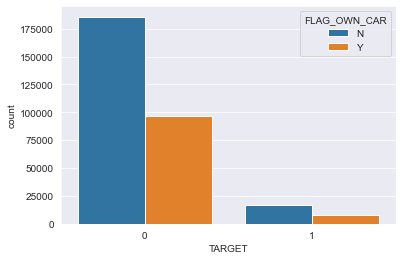

In [36]:
# car owners with defaulted loans
sns.countplot(application_train['TARGET'], hue=application_train['FLAG_OWN_CAR'])

E:\Anaconda3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CNT_CHILDREN', ylabel='count'>

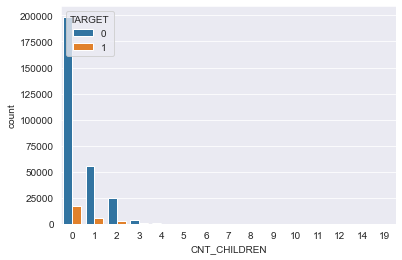

In [35]:
# customer load status base on number of childern
sns.countplot(application_train['CNT_CHILDREN'], hue=application_train['TARGET'])